## Model specification

In [ ]:
using Distributions, HMMBase, Plots
# Following the example at https://maxmouchet.github.io/HMMBase.jl/stable/examples/basic_usage/

a = [0.6, 0.4]
A = [0.9 0.1; 0.1 0.9]
B = [MvNormal([0.0, 5.0], ones(2) * 1), MvNormal([0.0, 5.0], ones(2) * 3)]
hmm = HMM(a, A, B)
size(hmm) # (number of states, observations dimension)

## Sampling

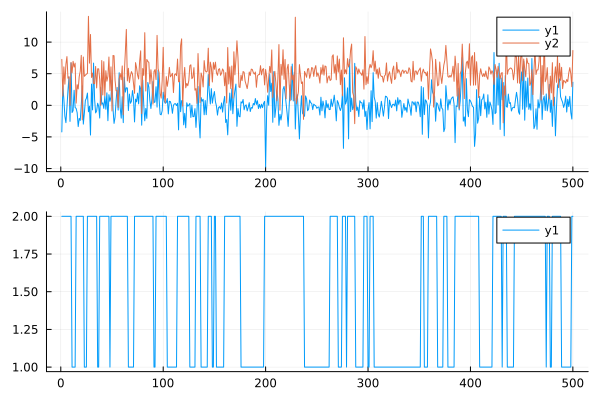

In [1]:
z, y = rand(hmm, 500, seq = true)

p1 = plot(y)
p2 = plot(z)

plot(p1, p2, layout = (2, 1))

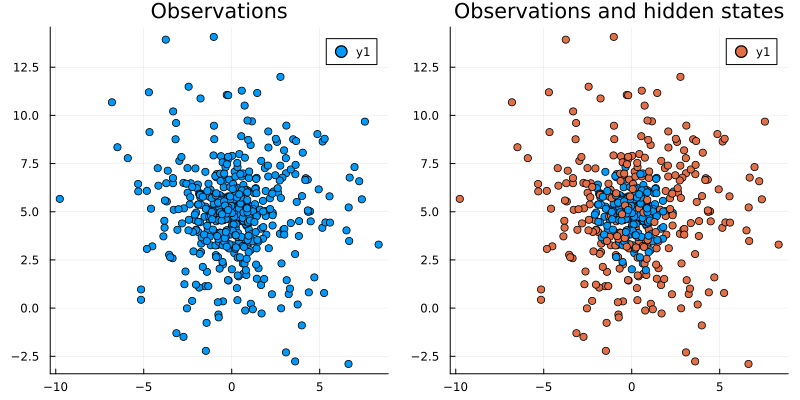

In [7]:
p1 = plot(y[:, 1], y[:, 2], seriestype = :scatter, title = "Observations")
p2 = plot(y[:, 1], y[:, 2], c = z, seriestype = :scatter, title = "Observations and hidden states")
plot(p1, p2, layout = (1, 2), size = (800, 400))

## Inference

In [8]:
α, logtot = forward(hmm, y)
β, logtot = backward(hmm, y)


γ = posteriors(hmm, y)
γ = posteriors(α, β)

size(α), size(β), size(γ)

((500, 2), (500, 2), (500, 2))

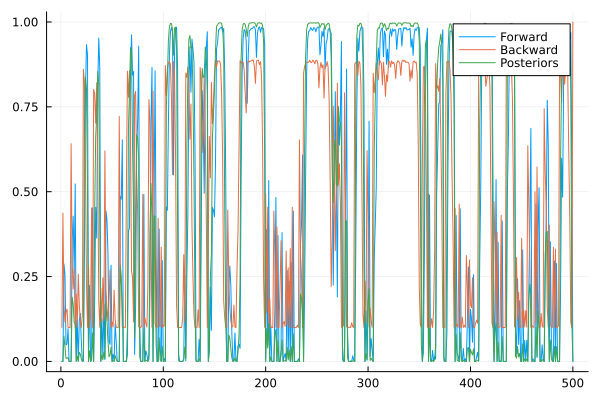

In [13]:
plot([α[:, 1] β[:, 1] γ[:, 1]], label = ["Forward" "Backward" "Posteriors"])